In [2]:
import numpy as np
from skimage import io
from scipy.optimize import curve_fit
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from xcorr_funcs import normxcorr2, FastPeakFind, maxk, gauss1
from corrTrack import track_spheres
from scipy import exp
from myImageLib import bpass
from scipy import signal
from xcorr_funcs import normxcorr2
import cv2

In [7]:
img = io.imread(r'I:\Github\Python\Tracking\corrTrack\test_file\video.tif')
mask = io.imread(r'I:\Github\Python\Tracking\corrTrack\test_file\maski.tif')
num_images = img.shape[0]
num_particles = 3
nTotal = 100
fid = open(r'I:\Github\Python\Tracking\corrTrack\test_file\xyt.dat', 'w')
fid.write('X\tY\tframe\n')
for num, frame in enumerate(img):
    print('Processing image ' + str(num) + ' ...')
    max_coor, pk_value = track_spheres(frame, mask, num_particles)
    for coor in max_coor.transpose():
        fid.write('%f\t%f\t%d\n' % (coor[0], coor[1], num))
    # plt.imshow(frame)
    # plt.plot(max_coor[1], max_coor[0], 'ro')
    # plt.show('block')
    if num >= nTotal - 1:
        break
fid.close()

Processing image 0 ...
Processing image 1 ...
Processing image 2 ...
Processing image 3 ...
Processing image 4 ...
Processing image 5 ...
Processing image 6 ...
Processing image 7 ...
Processing image 8 ...
Processing image 9 ...
Processing image 10 ...
Processing image 11 ...
Processing image 12 ...
Processing image 13 ...
Processing image 14 ...
Processing image 15 ...
Processing image 16 ...
Processing image 17 ...
Processing image 18 ...
Processing image 19 ...
Processing image 20 ...
Processing image 21 ...
Processing image 22 ...
Processing image 23 ...
Processing image 24 ...
Processing image 25 ...
Processing image 26 ...
Processing image 27 ...
Processing image 28 ...
Processing image 29 ...
Processing image 30 ...
Processing image 31 ...
Processing image 32 ...
Processing image 33 ...
Processing image 34 ...
Processing image 35 ...
Processing image 36 ...
Processing image 37 ...
Processing image 38 ...
Processing image 39 ...
Processing image 40 ...
Processing image 41 ...
Pr

In [5]:
img = io.imread(r'R:\Dip\DNA_chain\fluorescent\bad_images\bad_images0010.tif')
bp = bpass(img, 3, 100)

In [15]:
cv2.imwrite(r'R:\Dip\DNA_chain\fluorescent\bad_images\bp.tif', bp)

True

In [64]:
max_coor, pk_value = track_spheres(img, np.invert(mask), 15)

In [56]:
max_coor

array([[276.15372 ,  14.566118, 518.73895 , 258.0073  , 485.64746 ],
       [264.13486 , 486.68    , 106.63914 , 291.97604 , 108.07961 ]],
      dtype=float32)

<IPython.core.display.Javascript object>


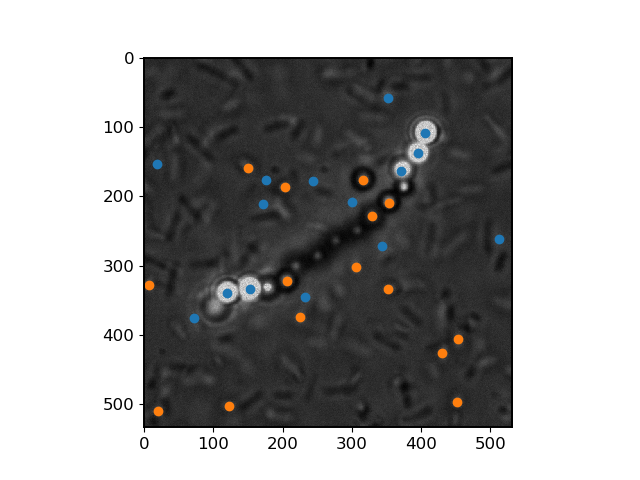

In [65]:
plt.imshow(img, cmap='gray')
plt.scatter(max_coor[1, :], max_coor[0, :])

<IPython.core.display.Javascript object>


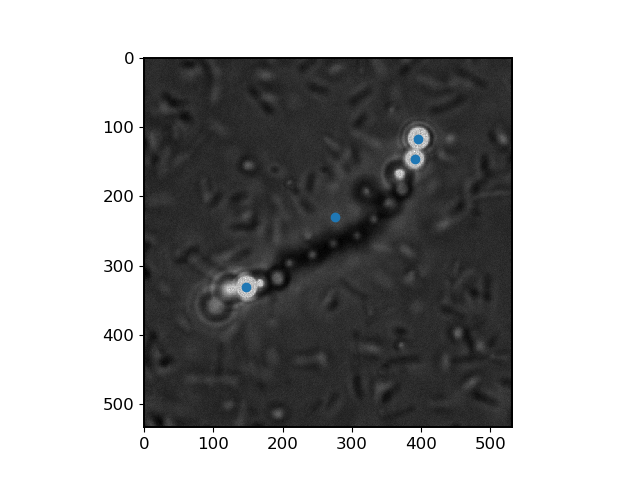

In [6]:
%matplotlib nbagg
mask = io.imread(r'R:\Dip\DNA_chain\fluorescent\bad_images\bp-mask.tif')
max_coor, pk_value = track_spheres(bp, np.invert(mask), 4)
plt.imshow(img, cmap='gray')
plt.scatter(max_coor[1, :], max_coor[0, :])

<IPython.core.display.Javascript object>


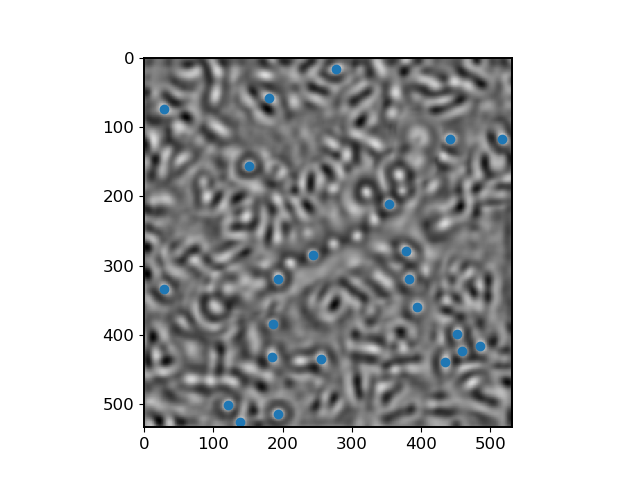

In [32]:
mask2 = io.imread(r'R:\Dip\DNA_chain\fluorescent\bad_images\bp-mask-2.tif')
max_coor2, pk_value2 = track_spheres(bp, np.invert(mask2), 23)
plt.imshow(img, cmap='gray')
plt.scatter(max_coor2[1, :], max_coor2[0, :])

<IPython.core.display.Javascript object>


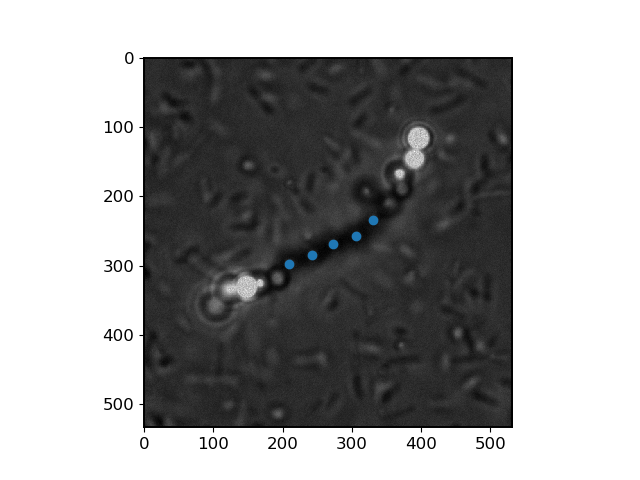

In [38]:
mask3 = io.imread(r'R:\Dip\DNA_chain\fluorescent\bad_images\bp-mask-3.tif')
max_coor3, pk_value3 = track_spheres(bp, np.invert(mask3), 5)
plt.imshow(img, cmap='gray')
plt.scatter(max_coor3[1, :], max_coor3[0, :])

<IPython.core.display.Javascript object>


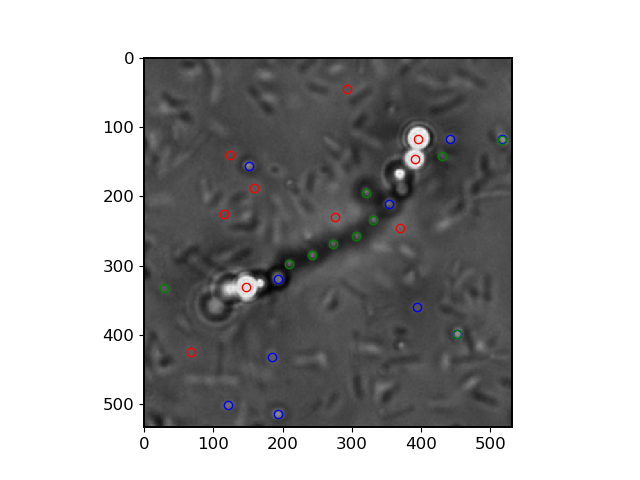

In [47]:
corr = normxcorr2(np.invert(mask3), img, mode='same')
plt.imshow(bp, cmap='gray')

In [51]:
max_coor, pk_value = track_spheres(bp, np.invert(mask3), 10)
plt.scatter(max_coor[1, :], max_coor[0, :], c=(0,0,0,0), edgecolors='green')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
